In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing,model_selection
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
from numpy.random import seed
# setting the seed
seed(0)
tf.random.set_seed(0)

In [3]:
df = pd.read_csv(r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\loan_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [5]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
dfna = df.dropna()
dfna

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [7]:
print(df['TARGET'])

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64


In [8]:
dfna.shape

(8602, 122)

In [9]:
value = set(dfna['TARGET'])

In [10]:
print(value)

{0, 1}


In [11]:
zeros = dfna['TARGET'].isin([0]).sum()
print(zeros)

8076


In [12]:
ones = dfna['TARGET'].isin([1]).sum()
print(ones)

526


In [13]:
print((zeros / ones)*100)

1535.361216730038


In [14]:
X = dfna.drop('TARGET', axis = 1)


In [15]:
Y = dfna['TARGET']

In [16]:
X.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [17]:
#One Hot Coding:
dfonehot = pd.get_dummies(dfna, columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'])

In [18]:
print(dfonehot.columns.values)

['SK_ID_CURR' 'TARGET' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH'
 'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE'
 'FLAG_MOBIL' 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE'
 'FLAG_PHONE' 'FLAG_EMAIL' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'HOUR_APPR_PROCESS_START'
 'REG_REGION_NOT_LIVE_REGION' 'REG_REGION_NOT_WORK_REGION'
 'LIVE_REGION_NOT_WORK_REGION' 'REG_CITY_NOT_LIVE_CITY'
 'REG_CITY_NOT_WORK_CITY' 'LIVE_CITY_NOT_WORK_CITY' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_AVG'
 'LANDAREA_AVG' 'LIVINGAPARTMENTS_AVG' 'LIVINGAREA_AVG'
 'NONLIVINGAPARTMENTS_AVG' 'NONLIVINGAREA_AVG' 'APARTMENTS_MODE'
 'BASEMENTAREA_MODE' 'YEARS_BEGINEXPLUATATION_MODE' 'YEARS_BUILD_MODE'
 'COMMONAREA_MODE' 'E

In [19]:
X_new = dfonehot.drop('TARGET', axis = 1)

In [20]:
Y_new = dfonehot['TARGET']

In [21]:
dfonehot.shape

(8602, 235)

In [22]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X_new,Y_new,test_size=0.3)

In [23]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6021, 234) (2581, 234) (6021,) (2581,)


In [24]:
x = np.asarray(X_train).astype('float32')

In [25]:
x_test = np.asarray(X_test).astype('float32')

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, Y_train_under = undersample.fit_resample(X_train, Y_train)

In [28]:
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_test_under, Y_test_under = undersample.fit_resample(X_test, Y_test)

In [29]:
from collections import Counter

In [30]:
print("After undersampling: ", Counter(Y_train_under))

After undersampling:  Counter({0: 350, 1: 350})


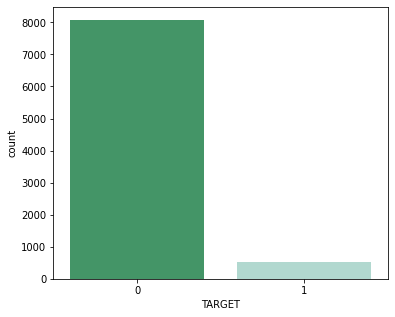

In [31]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,5))
sn.countplot(x='TARGET', data=dfonehot,
            palette="BuGn_r")
plt.show()

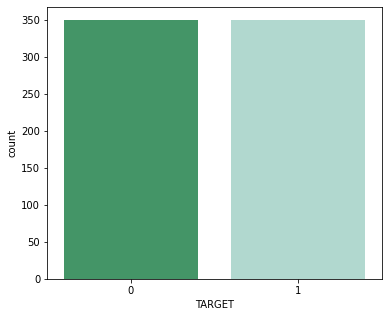

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,5))
sn.countplot(x=Y_train_under, 
            palette="BuGn_r")
plt.show()

In [33]:
Early_Stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 20, restore_best_weights = True)

In [34]:
model = keras.Sequential([
    layers.Dense(25,activation='relu',input_shape=[234]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(12,activation='relu'),
    layers.Dense(1),
])

In [35]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')


In [36]:
history = model.fit(X_train_under,Y_train_under,
                  validation_data=(X_test_under,Y_test_under),batch_size=256,
                  epochs=500,callbacks=[Early_Stopping],verbose=2)

Epoch 1/500
3/3 - 3s - loss: 4.6227 - val_loss: 5.0944
Epoch 2/500
3/3 - 0s - loss: 4.3342 - val_loss: 4.5775
Epoch 3/500
3/3 - 0s - loss: 3.8848 - val_loss: 4.1240
Epoch 4/500
3/3 - 0s - loss: 3.8680 - val_loss: 3.4429
Epoch 5/500
3/3 - 0s - loss: 3.4487 - val_loss: 2.7323
Epoch 6/500
3/3 - 0s - loss: 3.2875 - val_loss: 2.0268
Epoch 7/500
3/3 - 0s - loss: 2.8710 - val_loss: 1.7835
Epoch 8/500
3/3 - 0s - loss: 2.6835 - val_loss: 1.6842
Epoch 9/500
3/3 - 0s - loss: 2.8088 - val_loss: 1.4849
Epoch 10/500
3/3 - 0s - loss: 2.3095 - val_loss: 1.4520
Epoch 11/500
3/3 - 0s - loss: 2.4115 - val_loss: 1.4004
Epoch 12/500
3/3 - 0s - loss: 2.3702 - val_loss: 1.3594
Epoch 13/500
3/3 - 0s - loss: 2.4602 - val_loss: 1.3555
Epoch 14/500
3/3 - 0s - loss: 2.0008 - val_loss: 1.2763
Epoch 15/500
3/3 - 0s - loss: 2.1052 - val_loss: 1.2343
Epoch 16/500
3/3 - 0s - loss: 2.0992 - val_loss: 1.1591
Epoch 17/500
3/3 - 0s - loss: 2.3522 - val_loss: 1.1449
Epoch 18/500
3/3 - 0s - loss: 1.9046 - val_loss: 1.1012
E

In [37]:
history_df=pd.DataFrame(history.history)

In [38]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

<AxesSubplot:>

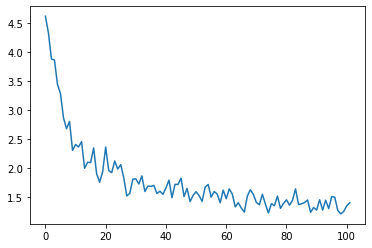

In [39]:
history_df.loc[:,'loss'].plot()

In [40]:
accuracy=model.evaluate(X_train_under,Y_train_under)

22/22 [==============================] - 0s 1ms/step - loss: 0.9278


In [41]:
print(accuracy*100)

92.78468489646912


In [59]:
Y_test_under

0      0
1      0
2      0
3      0
4      0
      ..
347    1
348    1
349    1
350    1
351    1
Name: TARGET, Length: 352, dtype: int64

In [61]:
model.predict_classes(X_test_under)

C:\Users\utkar\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [58]:
a = model.predict_classes(X_test_under)
m = tf.keras.metrics.SpecificityAtSensitivity(0,num_thresholds=1)
m.update_state(Y_test_under,a)
print('Final result: ', m.result().numpy()) 

Final result:  0.9886364


C:\Users\utkar\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
